In [153]:
import pandas as pd
import matplotlib.pyplot as plt

In [154]:
UNU_to_EU6 = {
    1:      4,
    2:      4,
    101:    4,
    102:    4,
    103:    4,
    104:    4,
    105:    4,
    106:    4,
    108:    1,
    109:    1,
    111:    1,
    112:    1,
    113:    1,
    114:    5,
    201:    5,
    202:    5,
    203:    5,
    204:    5,
    205:    5,
    301:    6,
    302:    6,
    303:    2,
    304:    6,
    305:    6,
    306:    6,
    307:    4,
    308:    2,
    309:    2,
    401:    5,
    402:    5,
    403:    5,
    404:    5,
    405:    5,
    406:    5,
    407:    2,
    408:    2,
    501:    5,
    502:    3,
    503:    3,
    504:    3,
    505:    3,
    506:    5,
    507:    5,
    601:    5,
    602:    4,
    701:    5,
    702:    6,
    703:    4,
    801:    5,
    802:    4,
    901:    5,
    902:    4,
    1001:   4,
    1002:   1
}
UNU_digital = [301, 302, 303, 304, 305, 306, 307, 309, 401, 402, 404, 406, 702]

In [155]:
# CSV files extracted from France Excel file from the source

pom_eu6 = pd.read_csv('pom_eu6.csv', index_col=0)
pom_unu = pd.read_csv('pom_unu.csv', index_col=0)
weee_eu6 = pd.read_csv('weee_eu6.csv', index_col=0)
weee_unu = pd.read_csv('weee_unu.csv', index_col=0)

In [156]:
def plot_eu6(eu6_data, unu_data, year, data_name, tonnes_or_pieces):

    # Pick only digital equipment by UNU
    unu_digital_data = unu_data.loc[unu_data.index.isin(UNU_digital), :]

    # Convert from UNU to EU-6
    unu_digital_data['eu6'] = [UNU_to_EU6[u] for u in unu_digital_data.index]

    # Select a year of digital equipment data and calculate to EU-6 from UNU
    eu6_digital_year = unu_digital_data.groupby('eu6')[str(year)].sum()

    # Add 0 to to category without digital equipment
    for cat in range(1,6+1):
        if cat not in eu6_digital_year.index:
            eu6_digital_year[cat] = 0
    
    # Sort by category
    eu6_digital_year = eu6_digital_year.sort_index()

    eu6_year = eu6_data[str(year)]

    plt.bar([cat for cat in range(1,7)], eu6_year)
    plt.bar([cat for cat in range(1,7)], eu6_digital_year)
    plt.xlabel('EU-6 category')
    plt.ylabel(tonnes_or_pieces.capitalize())
    plt.title(data_name + ' in ' + str(year) + ' in ' + tonnes_or_pieces)
    plt.legend(['All EEE', 'Digital'])

    digital_percent = list(eu6_digital_year / eu6_year * 100)
    digital_percent_label = [
        str(int(p)) + '%' if p.is_integer() 
        else ('{:.2f}'.format(p) + '%')
        for p in digital_percent 
    ]
    for i in range(1, len(digital_percent_label)+1):
        plt.text(i,
                 eu6_year[i] + (5e3 if tonnes_or_pieces == 'tonnes' else 5e6),
                 digital_percent_label[i-1], ha='center', color='darkorange')

/tmp/ipykernel_14417/2376968365.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unu_digital_data['eu6'] = [UNU_to_EU6[u] for u in unu_digital_data.index]


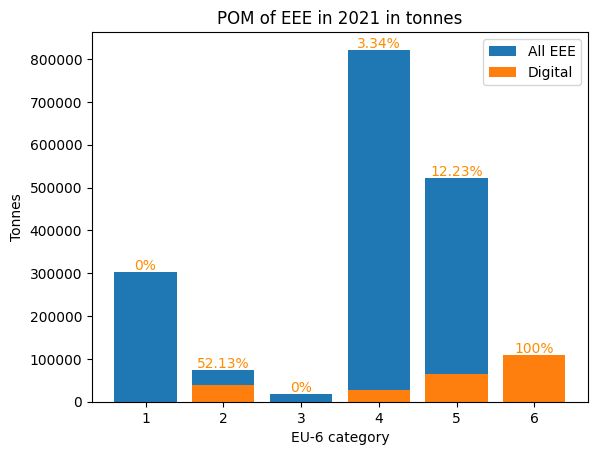

In [157]:
plot_eu6(pom_eu6, pom_unu, 2021, 'POM of EEE', 'tonnes')

/tmp/ipykernel_14417/2376968365.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unu_digital_data['eu6'] = [UNU_to_EU6[u] for u in unu_digital_data.index]


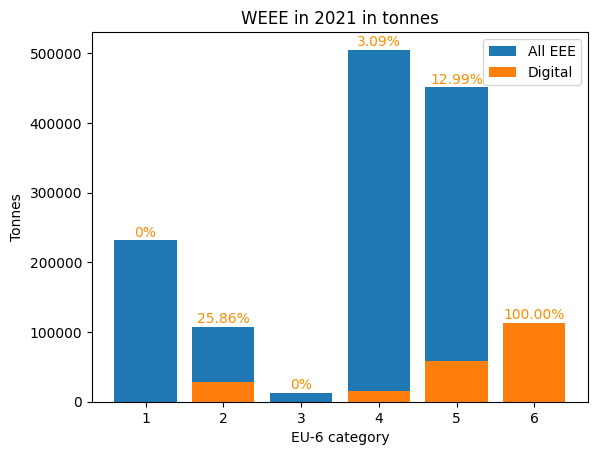

In [158]:
plot_eu6(weee_eu6, weee_unu, 2021, 'WEEE', 'tonnes')

# Plot graphs in pieces

In [159]:
# kg/piece
avg_weight = pd.read_csv('average_weight.csv', index_col=0)

# Convert from tonnes to pieces
pom_unu_nb = pom_unu.copy(deep=True) * 1000     # convert to kg
for col in pom_unu_nb.columns:
    pom_unu_nb[col] = pom_unu_nb[col] / avg_weight['2016']

weee_unu_nb = weee_unu.copy(deep=True) * 1000     # convert to kg
for col in weee_unu_nb.columns:
    weee_unu_nb[col] = weee_unu_nb[col] / avg_weight['2016']

In [160]:
pom_eu6_nb_dict = {}

for year in pom_unu_nb.columns:
    sum_eu_6 = [0,0,0,0,0,0]
    for unu in pom_unu_nb.index:
        sum_eu_6[UNU_to_EU6[unu]-1] += pom_unu_nb[year][unu]
    pom_eu6_nb_dict[year] = sum_eu_6

pom_eu6_nb = pd.DataFrame(pom_eu6_nb_dict, index=[1,2,3,4,5,6])
pom_eu6_nb

1980          1981          1982          1983          1984  \
1  1.049581e+06  1.130179e+06  1.211779e+06  1.294441e+06  1.376219e+06   
2  9.225703e+05  1.049129e+06  1.177201e+06  1.306864e+06  1.436111e+06   
3  3.465047e+07  3.650182e+07  3.837713e+07  4.027785e+07  4.214419e+07   
4  4.065070e+06  4.386065e+06  4.711047e+06  5.040239e+06  5.366069e+06   
5  1.509374e+08  1.599120e+08  1.690011e+08  1.782119e+08  1.875522e+08   
6  5.681298e+06  7.860117e+06  1.006410e+07  1.230281e+07  1.454811e+07   

           1985          1986          1987          1988          1989  ...  \
1  1.459125e+06  1.542533e+06  1.627142e+06  1.712898e+06  1.800081e+06  ...   
2  1.566943e+06  1.698707e+06  1.832173e+06  1.967314e+06  2.104480e+06  ...   
3  4.403915e+07  4.594357e+07  4.787820e+07  5.098528e+07  5.414065e+07  ...   
4  5.696361e+06  6.028677e+06  6.365742e+06  6.707360e+06  7.054623e+06  ...   
5  1.972683e+08  2.070383e+08  2.169558e+08  2.270127e+08  2.372448e+08  ...   
6  2.041704e+07  2.633728e+07  3.232078e+07  3.837020e+07  4.449515e+07  ...   

           2012          2013          2014          2015          2016  \
1  6.961940e+06  6.512886e+06  6.158957e+06  6.429077e+06  6.911884e+06   
2  2.106033e+07  1.994564e+07  1.932381e+07  1.945728e+07  1.818220e+07   
3  1.370186e+08  1.058081e+08  7.483860e+07  6.460523e+07  8.243122e+07   
4  2.558803e+07  2.362229e+07  2.237955e+07  2.386471e+07  2.164216e+07   
5  5.107150e+08  5.040348e+08  5.099208e+08  5.105089e+08  5.005666e+08   
6  1.335018e+08  1.273533e+08  1.215828e+08  1.155822e+08  1.222354e+08   

           2017          2018          2019          2020          2021  
1  6.840659e+06  7.132899e+06  7.931079e+06  7.917735e+06  7.885304e+06  
2  1.717031e+07  1.736486e+07  1.655291e+07  1.661965e+07  1.670271e+07  
3  8.827030e+07  1.073135e+08  1.197432e+08  1.393698e+08  1.613373e+08  
4  2.476770e+07  2.703122e+07  2.741674e+07  2.727365e+07  3.345608e+07  
5  5.444866e+08  5.607022e+08  5.616521e+08  5.175320e+08  5.814796e+08  
6  1.332177e+08  1.335802e+08  1.246055e+08  1.245131e+08  1.344034e+08  

[6 rows x 42 columns]

In [161]:
weee_eu6_nb_dict = {}

for year in weee_unu_nb.columns:
    sum_eu_6 = [0,0,0,0,0,0]
    for unu in weee_unu_nb.index:
        sum_eu_6[UNU_to_EU6[unu]-1] += weee_unu_nb[year][unu]
    weee_eu6_nb_dict[year] = sum_eu_6

weee_eu6_nb = pd.DataFrame(weee_eu6_nb_dict, index=[1,2,3,4,5,6])
weee_eu6_nb

1980          1981          1982          1983          1984  \
1  6.822937e+03  2.084198e+04  4.219156e+04  7.111239e+04  1.077232e+05   
2  1.746282e+03  1.157783e+04  3.434062e+04  7.362046e+04  1.318107e+05   
3  1.173254e+06  3.506817e+06  6.603312e+06  1.019531e+07  1.406797e+07   
4  2.527255e+04  9.674612e+04  2.137856e+05  3.752376e+05  5.789883e+05   
5  7.216231e+06  1.767345e+07  2.977547e+07  4.275817e+07  5.617437e+07   
6  3.997229e+05  1.121354e+06  2.122586e+06  3.370253e+06  4.830202e+06   

           1985          1986          1987          1988          1989  ...  \
1  1.520049e+05  2.037895e+05  2.627711e+05  3.285179e+05  4.004917e+05  ...   
2  2.100447e+05  3.081872e+05  4.249194e+05  5.579308e+05  7.041973e+05  ...   
3  1.805012e+07  2.201101e+07  2.585770e+07  2.958236e+07  3.319592e+07  ...   
4  8.220150e+05  1.100568e+06  1.410374e+06  1.746867e+06  2.105404e+06  ...   
5  6.975460e+07  8.332834e+07  9.680152e+07  1.101279e+08  1.232917e+08  ...   
6  6.786823e+06  9.345024e+06  1.251415e+07  1.625756e+07  2.051559e+07  ...   

           2012          2013          2014          2015          2016  \
1  3.511284e+06  3.738875e+06  3.961544e+06  4.178210e+06  4.386550e+06   
2  1.168447e+07  1.308780e+07  1.440416e+07  1.559590e+07  1.662300e+07   
3  1.401874e+08  1.409116e+08  1.389730e+08  1.344877e+08  1.288429e+08   
4  1.189786e+07  1.245033e+07  1.303437e+07  1.364224e+07  1.426619e+07   
5  3.863015e+08  3.959744e+08  4.058690e+08  4.161430e+08  4.244017e+08   
6  1.038383e+08  1.081985e+08  1.114326e+08  1.134184e+08  1.151701e+08   

           2017          2018          2019          2020          2021  
1  4.589305e+06  4.785835e+06  4.975241e+06  5.159687e+06  5.336400e+06  
2  1.744341e+07  1.805002e+07  1.845346e+07  1.867066e+07  1.873507e+07  
3  1.223333e+08  1.158759e+08  1.101267e+08  1.055903e+08  1.027753e+08  
4  1.490463e+07  1.556762e+07  1.626208e+07  1.697959e+07  1.770505e+07  
5  4.329194e+08  4.412443e+08  4.507384e+08  4.583023e+08  4.660111e+08  
6  1.180465e+08  1.206599e+08  1.216723e+08  1.219266e+08  1.231650e+08  

[6 rows x 42 columns]

/tmp/ipykernel_14417/2376968365.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unu_digital_data['eu6'] = [UNU_to_EU6[u] for u in unu_digital_data.index]


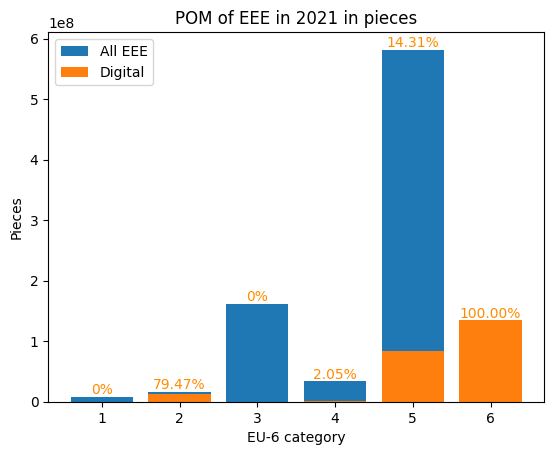

In [162]:
plot_eu6(pom_eu6_nb, pom_unu_nb, 2021, 'POM of EEE', 'pieces')

/tmp/ipykernel_14417/2376968365.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unu_digital_data['eu6'] = [UNU_to_EU6[u] for u in unu_digital_data.index]


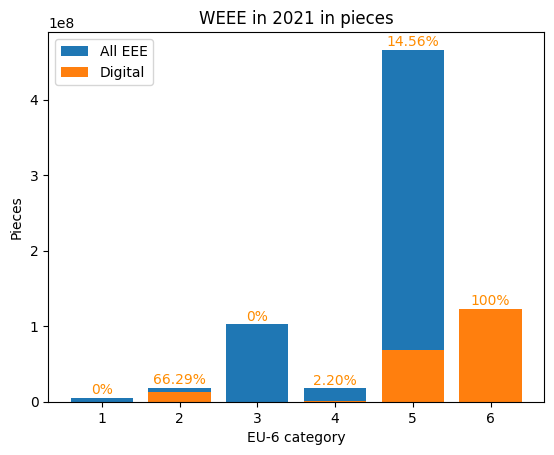

In [163]:
plot_eu6(weee_eu6_nb, weee_unu_nb, 2021, 'WEEE', 'pieces')